<a href="https://colab.research.google.com/github/XianNg24/COMP0088_intro_to_machine_learning/blob/main/1675294699.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP0088 Individual Coursework: **Heroes of Machlearnia**


# Instructions

For this assignment you are asked to analyse some data and make
predictions from it, explaining and justifying the choices you
make along the way.

**Your dataset is ID 1675294699. This data is unique to you.**

Although everyone is solving the same overall shape of problem, the
details will vary and may give rise to answers that are qualitatively
and numerically different. Do not be surprised if your results do not
agree with those of your colleagues.

The tasks below are mostly solvable with methods covered in the first
half of the module, prior to the coursework release.
One task is deceptively difficult and you may not be able to solve it
“properly”; that is okay, do what you can with the tools available
to you and try to explain why they might be insufficient.
You may employ other methods from beyond the module if you wish,
but there are no bonus marks available for doing so.

All tasks should be performed within this notebook.
For each task, we include:

* an editable **code cell**, in which you should write any code needed
to solve the problem and generate the requisite outputs
* an editable **markdown cell**, in which you should *briefly* explain
your approach and point out anything interesting about the problem
or results

You may find it useful to add further cells for a task, for example to
make your code structure clearer or to interleave plots with your
explanation — this is fine, but make sure that the order and meaning
are unambiguous, and that executing **Run all** on the notebook from
scratch works without errors. Also note that if you split up your text
answer into multiple cells, the word limit applies to the combined total.

**Once you have completed all tasks, submit the whole notebook via Moodle,
along with a CSV file of results that you will generate below.**


# Background

In the bleak highland province of Machlearnia, four clans of
whisky-sodden, claymore-wielding, kilted and bagpiping ruffians
make their homes. They are clans
Harris, Macdougall, Moffat and Sterling
and each is more bloodthirsty than the last. Their predilection for
drunken brawling is exceeded only by a profound love of gambling,
and it is by this narrow preference that an uneasy peace has held
for nearly 40 years. Can it survive another?

The highlight of every year is the Autumn Clanmoot, when the clans
come together on neutral ground to feast, carouse, trade insults and
wager vast sums on the arcane sport of Grachlangenball, in a tournament
played over five days. The victorious clan are proclaimed
Heroes of Machlearnia, entitled to wear pheasant feathers in their beards
all winter. They almost never do this, because it looks ridiculous,
but the prize is hotly contested all the same.

Visitors flock to the moot from far beyond the borders of Machlearnia,
for the boozing and spectacle, for the frisson of danger. There is money
to be made and lost, merchandise to be bought and sold, and only a moderate
risk of being run through with a sword.

Visitors like **you**.

This will be your first Clanmoot. You are a stranger around here and you
don't really know how everything works. But you've nosed around a bit and
think you might be able to make your fortune.

The peoples of Machlearnia are characterised by ten frankly cryptic attributes:
acidity, depth, jitter, magic, pungency, tension, tickle, twist, urgency and vexity.
You know that a clan's performance in Grachlangenball is largely
determined by these attributes, but you don't know how — and the
clansfolk aren't telling.
In the run-up to this year's Clanmoot you have cunningly obtained
the stats on all the participants, but you don't know who is who.
However, you have also acquired more complete information from last
year's tournament, so hopefully that will give you some clues.

# Setting Up

## Imports

The following cell imports some commonly used Python libraries for
numerical computing and machine learning. It is possible to complete
all tasks using only these imports.

In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import sklearn
import sklearn.linear_model, sklearn.svm, sklearn.neural_network
import sklearn.neighbors, sklearn.tree, sklearn.ensemble
import sklearn.model_selection, sklearn.metrics, sklearn.feature_selection

If for some reason you need to make use of additional libraries
you may do so in the code cell below, with the following provisos:

* **Do not use anything obscure** — libraries should either already
be present on Colab or else readily installable via `pip` with no
configuration required. It is incumbent on you to ensure the markers
will be able to run your code easily, out of the box. We will not
troubleshoot it for you — anything that doesn't work without
intervention will get zero marks.
* **Do not use anything resource intensive** — the time and resources
available for marking this assignment are limited, and we will not even
attempt run anything that is likely to consume a lot of compute, memory
or disk space. This is a modest dataset and there is no reason to
apply heavyweight methods to it.
* **Explain why** you are using these libraries in the markdown cell below.

In [ ]:
# TODO: add any additional imports here

**TODO**: give reasons for additional imports, if any


## Data

All the data available to you is embedded in the code cell below as
a string literal in CSV format. When you run the cell it is parsed
into a [Pandas](https://pandas.pydata.org/docs/)
[DataFrame](https://pandas.pydata.org//docs/reference/api/pandas.DataFrame.html)
in the variable `data`. Use this to perform
the tasks in the subsequent sections.

We also create a copy of the dataframe, `answers`. Populate this with
your answers for tasks 2—4, below. Use the code cell at the end of the
notebook to export this to a CSV file, and include that file as part
of your coursework submission.

In [2]:
# @title
data_csv = '''acidity,depth,jitter,magic,pungency,tension,tickle,twist,urgency,vexity,clan,prowess,rank
25.5,39.88,94.57,58.86,89.79,23.33,66.4,22.62,100.25,37.92,moffat,48821.48,2
23.94,29.69,90.65,63.6,95.59,22.63,78.08,20.61,91.91,33.37,harris,55255.1,2
25.95,23.75,93.28,62.35,88.99,22.58,66.58,21.13,99.75,38.95,moffat,47956.21,1
32.05,27.23,92.93,60.54,90.59,19.14,78.57,21.94,93.32,44.4,sterling,49668.42,1
25.98,41.58,90.07,60.79,93.55,21.7,73.16,22.41,95.5,37.58,harris,52935.17,2
26.65,19.85,93.14,63.26,88.05,23.59,68.63,21.93,101.13,36.87,moffat,46960.05,0
28.98,15.59,90.03,60.4,88.22,20.63,76.12,19.63,95.12,47.49,sterling,47118.79,0
29.25,13.12,93.1,62.64,87.62,18.58,76.51,22.77,96.37,46.88,sterling,46491.56,2
30.07,20.96,93.9,61.57,90.56,19.42,76.02,19.43,94.68,44.81,sterling,49640.5,1
30.46,31.78,93.96,58.29,95.22,18.78,68.17,22.45,95.81,41.55,macdougall,54833.22,1
25.08,32.89,90.24,62.94,90.0,21.81,70.2,21.89,98.91,35.28,moffat,49026.5,2
32.21,26.66,94.53,66.39,88.8,19.63,79.24,18.55,92.06,44.02,sterling,47749.66,2
26.28,14.95,90.46,59.34,95.16,22.45,73.08,21.75,93.81,35.3,harris,54761.64,0
25.05,17.26,87.75,60.37,95.12,23.09,74.79,24.06,94.45,35.72,harris,54707.22,0
25.98,21.36,94.32,63.99,95.49,26.02,70.81,23.15,94.9,35.1,moffat,55165.41,0
30.29,23.78,94.73,57.08,93.74,21.22,70.3,20.79,93.99,41.18,macdougall,53165.59,1
27.25,25.75,94.15,60.47,95.59,21.35,76.13,18.28,92.44,34.53,harris,55265.24,1
31.75,25.82,93.76,62.66,87.05,21.41,76.94,21.23,94.76,43.91,sterling,45905.43,2
22.8,13.67,89.71,63.81,94.67,20.05,75.34,20.92,94.21,35.6,harris,54193.38,0
27.12,14.68,94.29,64.56,88.03,22.58,69.05,20.53,97.87,37.87,moffat,46940.56,0
30.58,26.99,95.87,57.59,95.18,19.59,67.28,20.93,93.41,41.95,macdougall,54797.59,1
24.57,30.76,92.88,59.36,91.43,21.04,67.91,21.4,98.57,39.72,moffat,50591.36,2
30.95,17.65,95.05,56.95,92.76,18.8,66.7,21.46,95.33,41.48,macdougall,52063.34,2
25.99,23.03,89.13,59.59,92.4,19.5,74.04,20.6,96.24,37.41,harris,51641.45,1
26.24,13.96,91.44,59.24,92.75,20.63,72.58,20.87,95.43,36.51,harris,52043.06,0
29.04,13.29,92.8,55.77,91.33,18.37,65.7,17.73,95.63,45.82,macdougall,50473.29,0
25.25,28.2,95.01,62.07,90.48,22.1,71.4,19.21,97.82,38.69,moffat,49566.24,1
29.99,11.91,92.3,62.05,89.89,20.5,77.25,20.36,95.21,45.8,sterling,48911.98,1
25.2,22.1,90.4,58.7,92.83,19.69,71.07,21.09,94.72,37.03,harris,52125.0,1
26.76,41.19,88.98,59.88,93.96,21.4,73.64,22.33,92.81,35.11,harris,53390.98,2
30.27,24.1,94.68,60.69,95.01,19.46,69.75,21.77,92.14,43.14,macdougall,54598.59,1
30.76,24.09,92.23,65.09,87.23,20.35,78.04,20.28,93.0,45.12,sterling,46084.52,2
27.11,32.19,91.03,63.1,88.81,22.27,69.16,20.51,100.42,38.35,moffat,47754.04,2
24.52,25.24,90.14,57.89,95.48,20.38,76.46,21.02,92.09,35.28,harris,55120.24,1
26.5,30.76,86.63,57.04,92.7,18.47,71.77,20.83,95.61,39.25,harris,51961.59,2
23.6,17.34,93.78,62.91,89.76,21.4,65.59,20.27,99.54,39.47,moffat,48780.53,0
31.18,25.96,92.24,64.64,89.3,19.15,77.79,22.69,96.05,40.88,sterling,48273.51,2
29.92,36.54,91.92,63.21,87.57,19.11,75.29,19.88,93.95,45.47,sterling,46435.98,2
25.84,35.23,93.15,62.25,87.37,22.99,70.87,17.75,97.38,37.65,moffat,46242.46,2
31.22,31.65,94.99,57.88,93.92,18.81,69.2,20.81,92.2,42.14,macdougall,53362.25,2
29.11,21.62,96.48,57.95,92.42,18.83,67.11,22.98,93.84,46.55,macdougall,51690.94,0
25.27,17.57,88.73,59.82,93.22,17.7,70.93,20.3,94.32,38.36,harris,52547.79,0
29.16,31.73,98.32,57.41,95.15,19.26,71.02,22.44,91.61,40.25,macdougall,54772.01,0
25.71,16.73,94.44,65.57,90.29,22.53,68.71,19.27,97.21,35.97,moffat,49359.23,0
24.89,23.13,92.6,62.03,88.61,22.72,67.37,21.61,97.22,38.57,moffat,47548.97,0
25.98,28.32,89.23,61.14,93.94,18.51,72.14,22.68,94.92,36.86,harris,53360.59,2
30.35,27.45,94.18,59.79,88.13,19.24,73.16,25.46,96.24,49.33,sterling,47036.03,0
24.88,33.66,90.42,61.32,94.66,20.51,74.36,19.52,94.58,34.15,harris,54186.43,2
25.68,29.96,94.66,62.76,91.6,21.75,69.09,19.69,100.16,37.93,moffat,50787.16,2
26.58,24.68,88.8,58.34,96.46,21.46,73.54,21.93,94.3,36.2,harris,56246.74,1
30.24,34.02,90.81,61.94,89.91,21.46,76.25,20.39,93.92,45.33,sterling,48930.55,1
29.49,28.58,92.66,64.2,90.62,21.39,78.35,24.19,91.99,42.88,sterling,49706.72,2
31.52,23.65,93.17,63.25,90.25,20.08,78.26,20.42,95.71,43.39,sterling,49303.22,2
29.18,31.16,91.39,57.76,88.55,21.43,78.43,22.99,94.68,47.17,sterling,47476.5,0
26.18,29.47,94.49,63.1,89.77,22.62,69.74,19.58,98.53,37.46,moffat,48797.92,2
25.56,21.17,92.29,61.35,95.79,21.12,73.33,23.07,94.82,36.18,harris,55486.75,0
30.48,18.39,94.52,58.37,95.13,20.43,69.19,23.97,92.17,41.86,macdougall,54737.67,1
26.3,27.35,92.29,60.29,88.51,24.44,69.26,21.08,99.33,38.38,moffat,47446.61,1
24.44,42.95,90.61,61.51,93.91,19.87,76.05,20.97,94.15,36.22,harris,53336.49,2
27.04,28.42,93.69,61.06,89.28,22.9,69.91,22.92,100.12,39.16,moffat,48268.95,1
31.27,22.67,95.25,63.69,90.15,17.95,75.07,21.81,95.16,46.48,sterling,49196.81,2
32.42,12.55,92.66,63.53,87.78,19.95,73.91,19.29,95.39,42.73,sterling,46662.24,2
25.25,45.15,96.21,62.39,89.53,22.08,67.06,21.48,102.37,38.42,moffat,48544.88,2
31.22,24.41,91.72,62.69,90.16,19.88,78.28,23.26,93.98,46.46,sterling,49199.46,2
24.57,41.24,90.0,57.45,95.84,20.73,72.71,19.29,93.2,37.85,harris,55534.0,2
24.47,28.36,87.12,57.16,91.81,19.21,72.53,21.95,96.45,37.07,harris,50980.45,2
25.0,32.34,93.71,65.38,89.21,23.36,69.6,22.76,98.95,39.24,moffat,48195.27,2
30.94,16.9,92.27,60.12,94.29,18.61,70.36,22.7,91.85,41.35,macdougall,53768.61,2
33.64,27.7,91.76,63.51,90.81,19.0,75.95,22.59,97.14,42.98,sterling,49902.81,2
22.69,18.77,88.66,59.35,93.36,20.48,74.41,19.46,93.45,35.77,harris,52712.74,0
31.63,15.19,94.54,58.26,96.17,20.01,66.43,22.0,93.49,41.42,macdougall,55930.32,2
25.92,24.89,94.47,63.28,90.79,26.64,69.8,20.42,97.37,35.91,moffat,49914.64,1
30.57,26.42,95.31,57.68,94.27,19.65,70.29,21.22,94.84,44.53,macdougall,53761.32,1
31.1,29.09,92.66,60.33,93.97,18.56,69.31,22.41,94.07,41.22,macdougall,53408.7,2
29.35,28.13,93.77,58.69,94.18,19.29,68.46,20.15,95.59,45.56,macdougall,53652.22,0
26.43,20.58,92.95,63.82,89.29,23.88,69.56,21.99,97.83,35.67,moffat,48279.68,0
29.02,16.38,94.72,59.72,93.72,19.9,69.95,23.38,97.05,43.38,macdougall,53139.13,0
32.01,28.82,92.93,61.93,89.07,22.02,76.34,21.34,94.24,42.41,sterling,48038.58,1
30.78,20.65,91.15,56.85,88.61,21.44,75.34,18.98,93.2,46.43,sterling,47539.33,0
31.51,30.57,94.24,62.49,90.48,18.81,74.99,21.18,92.49,46.2,sterling,49553.22,2
25.79,12.08,95.49,64.8,90.05,23.72,71.82,18.24,98.19,38.21,moffat,49107.06,0
25.91,22.91,96.67,64.3,88.97,23.42,70.47,22.53,98.04,35.25,moffat,47950.95,0
26.24,35.57,90.86,58.51,95.95,22.8,76.63,22.3,91.57,37.78,harris,55670.28,2
33.84,27.02,96.46,61.58,95.6,21.28,70.89,20.98,89.28,39.16,macdougall,55285.69,2
29.87,34.83,90.05,60.47,87.08,19.0,77.15,22.99,93.44,45.39,sterling,45914.78,0
31.62,23.44,92.3,60.13,90.69,19.08,74.17,20.12,95.37,48.49,sterling,49774.35,0
23.01,37.71,94.03,65.81,90.13,21.56,67.71,22.88,97.17,35.92,moffat,49181.42,2
23.98,13.11,94.09,62.62,87.7,21.37,66.55,22.36,98.64,37.63,moffat,46588.34,0
26.16,25.02,90.98,60.97,93.89,21.05,74.65,20.25,92.37,36.17,harris,53319.02,1
24.14,27.66,90.45,59.7,93.29,20.22,71.57,19.86,94.54,36.78,harris,52640.71,2
25.08,14.12,93.22,62.26,89.6,23.38,66.96,20.58,97.68,38.11,moffat,48611.8,0
25.23,21.02,94.4,61.82,91.05,23.89,68.96,20.27,97.89,38.34,moffat,50189.85,0
30.15,27.55,91.42,61.56,87.4,18.56,75.27,21.32,96.56,45.66,sterling,46253.9,1
25.98,20.81,95.23,62.85,91.51,21.86,71.15,21.16,96.4,34.61,moffat,50690.97,0
25.97,41.09,90.13,61.19,95.85,21.29,75.83,21.49,92.11,32.83,harris,55547.62,2
29.28,25.07,93.57,62.55,89.81,17.72,77.36,20.25,93.64,44.72,sterling,48822.42,2
25.65,36.65,94.28,64.47,89.59,19.92,69.1,21.66,99.87,37.92,moffat,48595.37,2
30.35,18.05,92.76,61.41,89.8,22.02,74.84,20.86,96.67,45.17,sterling,48821.49,1
24.21,28.52,96.28,62.14,91.66,24.14,71.6,20.95,98.04,35.46,moffat,50866.81,2
30.38,26.38,93.77,55.06,93.55,19.82,68.0,23.15,95.21,45.72,macdougall,52943.94,1
26.55,30.34,89.98,58.74,91.92,19.48,76.44,22.36,93.51,37.37,harris,51114.05,2
23.66,25.0,90.83,61.23,94.72,19.91,77.41,21.71,92.3,32.96,harris,54254.24,1
30.9,23.03,96.0,57.92,94.54,18.96,69.91,20.92,92.31,43.15,macdougall,54067.67,2
25.67,38.93,92.99,63.28,90.76,24.02,68.79,23.35,98.42,37.59,moffat,49868.29,2
24.4,32.4,91.42,60.4,93.99,20.87,73.25,23.86,94.33,38.95,harris,53432.92,2
32.5,30.15,94.44,57.8,94.41,19.64,69.85,21.2,93.61,42.56,macdougall,53916.27,2
30.72,13.27,93.4,56.34,94.0,18.74,70.71,21.85,92.77,41.1,macdougall,53445.84,2
22.38,27.87,89.83,59.57,89.49,22.02,67.56,19.62,99.02,39.77,moffat,48476.08,1
26.79,26.55,92.72,61.47,87.08,22.79,67.28,21.61,97.3,38.52,moffat,45937.09,1
24.4,20.48,90.35,60.59,95.12,21.65,74.17,19.4,93.96,35.52,harris,54713.19,0
25.19,16.7,90.86,60.7,96.38,21.19,74.82,18.46,92.09,35.39,harris,56161.7,0
30.9,28.75,92.34,63.66,89.2,19.63,75.97,22.96,93.66,47.16,sterling,48168.04,2
30.17,29.08,93.56,61.91,93.65,18.65,67.98,20.12,96.56,44.54,macdougall,53052.19,1
28.99,31.72,94.6,56.68,93.53,17.92,67.95,22.19,94.82,42.67,macdougall,52919.42,0
30.49,35.64,93.51,58.1,92.56,17.22,66.72,20.72,96.49,43.78,macdougall,51829.79,1
31.37,27.95,93.07,59.02,93.75,19.69,69.55,19.48,90.92,39.38,macdougall,53165.83,2
29.35,15.53,95.1,59.62,95.74,18.56,73.01,22.24,92.36,41.16,macdougall,55432.95,0
23.88,17.89,92.18,59.93,88.39,20.37,63.39,22.07,100.04,40.1,moffat,47306.43,0
24.88,39.4,87.86,57.86,95.64,20.96,75.08,23.21,94.05,36.49,harris,55296.09,2
31.4,13.54,90.97,61.78,91.55,20.09,78.79,21.43,94.27,44.45,sterling,50712.54,1
30.84,31.19,94.78,55.07,92.47,18.18,68.06,19.04,93.88,45.87,macdougall,51737.82,2
28.76,38.31,94.61,57.69,92.75,19.38,68.82,21.89,94.27,44.41,macdougall,52051.92,0
24.53,33.98,88.72,58.44,94.96,20.91,74.84,24.12,92.46,35.72,harris,54522.12,2
32.14,13.22,95.73,60.99,92.98,18.88,70.07,20.27,94.31,44.72,macdougall,52311.27,2
25.1,28.48,89.45,63.78,94.42,18.78,73.19,22.65,94.11,35.78,harris,53904.76,2
26.76,34.13,91.49,63.9,89.03,22.88,68.54,21.93,99.13,37.95,moffat,47992.74,2
23.03,15.29,88.57,58.94,96.16,21.47,74.84,21.97,92.42,35.79,harris,55899.1,0
26.47,27.43,89.41,61.52,95.01,21.13,76.99,21.11,94.26,34.58,harris,54582.32,2
22.73,13.74,87.02,53.94,94.73,21.22,73.64,21.76,95.7,38.34,harris,54254.42,0
28.56,23.51,92.71,56.04,92.6,19.18,68.47,22.48,93.34,44.4,macdougall,51876.88,0
25.58,29.11,94.26,66.2,89.94,20.67,70.49,23.09,100.95,35.29,moffat,48974.27,2
26.04,16.53,92.13,65.15,92.69,21.57,68.67,23.6,99.68,35.4,moffat,51981.87,0
26.76,15.87,93.17,62.3,87.57,21.49,67.13,21.74,101.71,39.08,moffat,46448.33,0
29.1,21.27,90.05,59.53,87.89,19.72,77.31,16.86,96.52,45.42,sterling,46767.16,0
24.31,35.22,90.83,60.86,88.91,22.11,67.92,21.64,98.86,38.64,moffat,47859.34,2
30.73,31.23,95.43,57.39,92.52,19.44,69.42,22.88,92.84,45.61,macdougall,51799.68,2
23.69,34.1,89.97,60.43,93.89,19.68,72.35,22.07,94.62,36.64,harris,53310.74,2
32.82,14.1,93.2,60.7,88.36,20.97,74.95,19.22,92.72,44.73,sterling,47280.65,1
30.28,27.52,96.07,60.8,93.12,20.86,70.76,17.72,91.98,41.76,macdougall,52474.84,1
23.59,26.15,92.06,61.22,89.66,22.38,67.22,21.58,98.29,38.71,moffat,48668.7,1
25.37,31.22,90.68,60.08,94.97,21.08,74.22,20.78,93.21,35.3,harris,54541.81,2
31.15,30.42,92.1,56.56,87.93,22.57,75.82,20.74,93.05,47.68,sterling,46826.21,0
30.13,13.66,89.37,59.01,89.46,21.15,75.63,20.91,95.94,47.74,sterling,48439.51,0
25.47,14.51,92.13,62.49,94.51,20.45,71.38,22.75,95.32,34.12,harris,54022.75,0
28.32,34.29,92.12,61.69,89.73,19.28,77.51,20.96,92.36,45.63,sterling,48735.35,1
30.48,25.54,95.45,55.23,93.72,20.08,67.13,19.22,93.05,45.08,macdougall,53142.6,1
31.25,28.45,93.03,59.06,93.32,19.39,69.29,22.84,94.35,44.21,macdougall,52681.79,2
30.39,15.48,91.09,62.24,88.09,20.32,77.04,21.15,95.58,44.49,sterling,46984.52,1
30.77,28.95,94.78,60.05,88.83,19.82,75.88,25.08,97.11,47.57,sterling,47783.05,0
28.32,19.27,94.12,61.02,93.78,20.08,70.19,21.87,93.39,43.22,macdougall,53204.92,0
26.1,22.26,89.93,58.42,94.95,21.93,75.34,22.15,94.64,35.57,harris,54518.44,1
25.52,17.86,91.01,60.52,93.6,21.95,75.46,19.63,93.67,35.74,harris,52995.7,0
22.94,21.76,88.51,58.22,92.57,18.35,71.24,20.03,94.69,36.46,harris,51824.34,1
26.22,29.45,93.76,61.36,95.94,21.41,77.32,23.88,90.49,33.61,harris,55666.1,2
31.7,25.91,91.87,58.55,87.99,19.73,73.87,20.78,92.78,48.51,sterling,46880.12,0
31.1,22.49,92.47,60.81,88.81,22.25,76.9,27.66,95.55,45.84,sterling,47759.98,1
31.54,27.87,95.11,59.27,93.76,20.57,71.06,22.24,91.42,44.2,macdougall,53187.82,2
25.52,21.59,89.43,61.07,96.7,21.53,74.87,20.06,92.75,35.96,harris,56527.71,1
30.65,15.57,93.81,56.94,93.88,20.34,69.12,21.9,93.73,44.33,macdougall,53317.11,1
29.65,20.29,95.64,64.73,90.21,19.83,77.64,24.82,94.46,43.29,sterling,49268.97,2
25.91,24.03,90.33,57.0,95.41,21.81,73.37,19.86,94.58,35.61,harris,55045.3,1
23.42,22.22,89.09,58.42,92.95,20.53,74.92,20.41,92.44,36.33,harris,52256.2,1
25.47,27.51,95.67,65.89,90.28,22.67,69.44,21.84,99.82,37.4,moffat,49353.63,1
24.84,26.6,90.61,57.38,86.19,20.86,64.82,21.08,103.15,40.46,moffat,44997.3,1
24.8,36.8,87.66,59.32,93.25,22.6,75.46,20.96,92.04,36.05,harris,52591.75,2
26.64,27.92,92.19,61.7,89.62,24.98,70.84,21.96,97.87,38.98,moffat,48634.4,1
29.84,25.62,92.45,60.54,86.33,17.49,72.91,21.0,96.78,44.81,sterling,45139.54,1
29.41,15.01,97.37,59.27,96.35,19.16,71.32,23.13,91.92,42.91,macdougall,56146.93,0
31.9,27.8,92.82,57.36,93.94,18.52,68.39,23.24,94.33,43.31,macdougall,53375.17,2
29.03,33.06,89.68,57.39,86.08,20.43,76.59,17.26,95.22,48.17,sterling,44878.72,0
25.42,21.27,88.53,58.96,95.2,21.83,74.31,18.82,93.6,35.97,harris,54797.89,0
31.9,33.63,92.31,61.34,88.89,20.6,75.5,24.44,95.9,44.46,sterling,47839.73,1
27.27,36.61,93.3,62.42,90.88,23.37,70.09,20.56,98.65,38.54,moffat,49998.48,2
26.52,28.92,92.5,62.41,89.7,22.31,68.94,22.03,99.22,37.07,moffat,48713.68,2
29.74,22.8,92.39,57.23,89.89,19.66,73.6,24.64,94.7,45.13,sterling,48909.8,0
27.13,11.15,87.71,58.17,93.88,21.2,73.5,20.77,94.71,36.39,harris,53295.11,0
31.49,37.33,96.03,59.33,92.85,18.32,70.24,22.59,94.06,42.88,macdougall,52165.99,2
27.79,29.15,90.75,64.25,90.82,23.92,69.5,20.59,98.33,36.16,moffat,49924.2,2
25.05,26.21,92.81,60.23,92.13,24.93,69.44,20.81,98.96,37.24,moffat,51373.62,1
26.84,20.88,90.51,58.53,95.95,21.72,75.78,20.68,92.91,37.41,harris,55665.53,0
29.49,25.02,95.64,58.88,94.2,18.82,69.82,20.87,93.81,45.69,macdougall,53680.74,0
26.62,27.46,94.09,68.26,90.15,23.77,70.62,21.06,97.37,35.24,moffat,49209.89,1
29.95,27.48,92.54,60.71,87.74,21.47,75.88,21.12,94.92,48.31,sterling,46624.41,1
30.63,23.26,92.72,61.34,92.28,19.12,76.57,21.47,94.94,46.73,sterling,51521.78,1
23.29,39.56,93.05,62.46,87.25,21.15,69.44,21.53,98.16,37.67,moffat,46110.98,2
31.14,32.16,93.67,61.14,88.14,18.25,74.62,20.98,95.77,46.85,sterling,47041.45,1
30.35,33.67,91.82,62.73,89.81,19.51,77.68,22.53,94.84,45.46,sterling,48820.86,2
32.38,13.35,92.75,60.47,90.56,22.95,74.1,20.44,96.73,47.32,sterling,49646.41,0
28.3,18.17,90.31,60.56,87.14,18.96,72.17,21.66,94.54,45.47,sterling,45978.38,1
24.65,17.84,89.38,59.13,91.78,19.8,70.81,23.74,97.04,37.29,harris,50958.3,0
26.25,32.74,92.03,63.86,89.66,23.26,68.56,19.33,97.76,36.63,moffat,48671.1,2
24.67,31.0,92.61,62.36,93.99,19.94,77.75,23.88,93.25,34.28,harris,53434.76,2
31.06,29.84,92.41,61.72,88.98,18.64,76.14,19.1,94.21,45.11,sterling,47930.07,1
23.58,27.23,89.97,62.57,95.88,20.67,75.19,21.78,96.73,37.26,harris,55579.74,1
32.24,31.02,97.5,58.14,95.08,20.06,69.93,20.87,93.46,44.32,macdougall,54691.35,2
24.96,38.46,93.11,62.56,86.43,21.9,66.51,20.17,99.15,37.45,moffat,45259.07,2
25.83,23.83,93.3,62.87,91.59,24.15,69.12,23.23,99.35,35.38,moffat,50778.0,1
28.82,19.09,94.54,58.89,95.61,20.65,69.21,22.99,92.45,41.87,macdougall,55287.78,0
23.07,24.37,92.65,60.51,95.18,19.93,73.35,21.49,93.71,37.31,harris,54785.57,1
29.05,23.77,93.79,56.57,94.63,18.0,68.02,19.57,92.79,45.04,macdougall,54158.27,0
28.03,28.87,95.97,57.94,96.78,19.28,71.11,23.15,92.63,42.34,macdougall,56639.82,0
23.41,19.44,87.76,59.17,91.62,19.27,72.62,22.51,94.28,37.81,harris,50774.15,0
23.16,24.53,91.34,57.5,92.32,19.1,70.46,21.54,96.09,37.19,harris,51560.65,1
27.82,20.68,92.15,63.96,88.14,23.29,69.78,22.3,97.81,40.29,moffat,47050.47,0
29.85,11.44,95.45,55.42,92.4,17.76,69.17,21.44,93.33,44.36,macdougall,51661.67,1
30.67,26.69,93.7,56.32,93.42,18.59,66.5,21.93,97.86,45.3,macdougall,52794.26,1
26.73,40.81,90.36,58.72,93.54,20.25,73.43,21.33,95.25,33.29,harris,52920.61,2
31.6,30.44,91.19,62.36,87.4,19.93,75.93,19.62,92.69,41.4,sterling,46257.09,2
30.94,8.88,96.7,56.18,92.76,17.83,66.73,19.47,95.92,45.72,macdougall,52066.61,2
23.66,19.61,92.1,60.67,89.15,22.37,66.68,20.86,98.13,39.05,moffat,48121.98,0
29.01,29.93,94.14,57.72,94.19,17.65,67.21,23.19,94.17,43.9,macdougall,53659.97,0
30.18,20.54,92.75,59.47,89.35,20.76,77.92,22.3,95.86,43.57,sterling,48333.76,0
33.52,20.62,94.4,62.3,87.7,22.03,77.77,19.62,94.55,42.66,sterling,46591.43,2
30.8,21.84,89.09,59.44,88.33,22.14,76.72,17.78,95.16,46.36,sterling,47236.03,0
26.37,28.41,94.09,61.16,89.41,23.15,67.99,20.54,98.8,38.58,moffat,48410.64,1
29.81,23.45,91.04,61.26,90.33,21.27,76.45,19.51,93.48,45.4,sterling,49384.88,1
31.0,27.35,94.08,59.16,87.94,21.95,76.44,22.91,94.24,45.5,sterling,46842.92,0
29.26,15.8,91.31,55.07,93.39,18.63,67.38,21.12,96.46,45.63,macdougall,52751.41,0
25.42,26.37,89.79,61.96,93.86,21.04,74.42,24.64,93.55,35.37,harris,53280.68,1
23.73,26.1,91.32,62.7,88.88,22.86,67.41,23.47,99.87,38.4,moffat,47831.65,1
30.46,24.98,91.38,59.53,88.72,21.35,73.47,20.12,92.97,42.49,sterling,47657.13,0
29.15,27.98,95.71,60.42,94.65,20.68,72.37,22.26,94.79,41.99,macdougall,54196.53,0
29.46,33.01,92.45,58.25,93.61,19.64,66.45,22.79,93.77,44.87,macdougall,53005.49,0
31.68,15.05,93.43,60.34,89.05,20.12,75.69,18.63,94.27,44.87,sterling,48013.57,0
25.2,16.07,93.81,63.36,88.65,21.52,70.5,23.07,99.03,34.74,moffat,47592.85,0
25.22,31.14,92.26,59.9,86.46,21.64,70.96,20.8,99.84,36.84,moffat,45285.79,2
28.18,32.2,92.81,61.02,91.92,21.97,68.81,20.33,99.66,36.88,moffat,51132.8,2
31.23,21.3,94.64,62.12,89.92,21.53,74.6,18.28,96.57,44.7,sterling,48956.8,1
29.44,31.3,91.62,57.91,87.44,20.41,74.93,22.2,96.23,46.07,sterling,46302.13,0
24.97,25.83,91.23,60.36,88.05,21.06,67.98,23.38,103.23,39.84,moffat,46945.02,1
24.3,25.71,88.74,57.92,92.6,22.2,71.92,21.64,95.01,36.47,harris,51870.15,1
31.05,33.13,93.11,59.07,94.77,20.54,68.59,21.63,93.97,42.6,macdougall,54322.17,2
32.22,29.7,92.71,61.92,91.81,19.64,76.75,23.09,96.27,44.19,sterling,51004.38,1
29.15,36.86,92.64,55.5,89.96,20.55,68.01,20.36,96.2,44.13,macdougall,48989.07,0
25.43,25.82,88.42,60.59,92.88,19.77,75.08,18.89,94.27,35.85,harris,52173.2,1
29.8,14.57,93.7,63.05,88.34,22.69,78.25,23.34,94.86,42.82,sterling,47266.58,2
31.55,29.6,90.87,61.93,90.3,22.13,77.41,19.8,96.14,46.23,sterling,49354.45,1
25.19,25.8,93.65,60.42,89.71,23.47,68.55,22.59,97.18,39.38,moffat,48732.2,1
27.69,29.87,94.99,57.45,93.29,15.68,68.34,21.89,95.87,42.62,macdougall,52645.12,0
32.14,30.17,92.37,60.84,86.95,19.66,74.03,19.35,91.59,43.09,sterling,45790.12,1
31.6,42.74,96.5,61.04,94.97,20.24,72.63,20.56,93.08,40.65,macdougall,54562.28,2
29.04,28.08,93.24,60.14,90.41,20.35,76.87,20.95,93.49,42.89,sterling,49477.83,0
29.72,10.57,93.39,57.17,92.29,16.68,66.88,19.89,95.57,45.28,macdougall,51528.33,1
32.52,26.55,91.14,62.92,91.34,17.94,75.94,20.54,94.99,45.43,sterling,50476.38,2
29.62,28.61,93.98,57.43,94.59,19.09,69.63,24.83,96.22,42.76,macdougall,54116.8,0
30.59,31.92,96.93,60.11,93.6,20.15,68.14,20.24,94.4,42.88,macdougall,53013.84,1
30.78,14.4,90.68,58.65,88.2,21.4,75.04,22.52,94.64,46.87,sterling,47102.2,0
23.3,17.97,91.65,62.26,88.49,23.33,68.92,22.47,98.85,38.67,moffat,47419.48,0
31.85,37.72,93.58,62.09,89.66,18.96,75.33,20.43,95.12,43.87,sterling,48664.73,1
25.2,36.75,95.32,63.35,91.81,21.64,71.5,21.22,100.36,38.62,moffat,51020.58,2
25.41,25.51,90.25,61.78,94.44,24.11,74.3,20.66,94.82,33.81,,,
31.47,23.04,96.42,59.98,93.52,20.59,67.9,21.47,94.67,43.4,,,
33.14,32.79,92.95,60.6,87.65,18.79,74.41,18.84,97.26,45.9,,,
26.28,21.25,87.46,61.16,94.46,22.93,74.45,20.86,93.75,35.31,,,
27.95,39.07,94.37,63.67,89.02,21.4,69.24,18.92,99.74,35.45,,,
27.19,25.12,93.48,63.8,89.13,20.47,71.06,24.02,97.52,36.42,,,
27.87,24.87,93.09,63.3,92.1,22.78,71.01,22.52,99.33,35.72,,,
29.48,6.19,96.61,59.62,93.9,21.12,69.52,22.46,91.63,42.71,,,
24.14,18.71,90.57,63.26,97.32,19.93,76.17,22.35,94.41,34.74,,,
26.55,16.78,93.21,62.69,90.08,24.43,70.46,22.08,94.28,37.14,,,
34.11,23.98,94.17,59.57,94.31,20.44,69.11,23.61,96.32,42.08,,,
30.29,17.39,93.04,59.54,91.08,19.54,73.83,22.41,96.03,46.62,,,
24.75,33.66,87.44,57.74,93.4,21.03,69.02,21.87,95.78,39.29,,,
25.43,36.59,94.89,63.15,88.73,22.63,67.32,20.2,100.67,37.2,,,
25.96,26.01,97.7,59.61,90.08,22.88,72.09,22.4,95.63,35.2,,,
25.29,19.65,95.39,62.8,87.09,22.83,69.79,19.27,99.14,39.06,,,
30.17,29.34,93.94,55.98,95.02,18.14,69.14,23.65,94.74,44.79,,,
30.22,33.75,95.28,57.09,94.4,17.44,68.25,21.61,96.45,44.81,,,
24.36,15.38,87.05,59.2,95.13,21.87,73.67,19.96,95.62,35.9,,,
23.31,21.67,86.8,58.8,94.05,19.03,74.45,22.08,91.62,35.72,,,
24.67,24.17,93.64,62.47,92.01,23.88,70.02,21.96,97.53,36.38,,,
23.08,25.85,90.65,61.21,93.98,21.54,77.04,22.72,90.32,33.74,,,
24.02,17.7,95.76,63.54,88.44,23.79,67.99,22.0,97.44,35.59,,,
24.91,37.84,93.27,62.33,87.38,25.44,71.04,21.02,100.95,38.2,,,
27.46,34.56,94.04,64.09,91.29,22.99,70.03,19.02,98.37,36.04,,,
24.57,18.1,91.75,59.11,94.22,22.65,73.14,22.1,93.47,39.14,,,
24.85,14.0,94.92,63.07,95.47,22.64,74.06,21.88,94.21,34.97,,,
30.39,22.88,92.32,60.1,88.3,19.04,72.41,21.83,96.93,44.14,,,
30.39,17.83,93.99,62.02,87.98,20.17,77.09,18.16,95.83,44.56,,,
25.1,29.37,87.93,58.1,91.99,21.07,71.29,23.32,92.75,37.37,,,
31.41,27.19,95.28,57.38,93.82,18.94,69.34,21.58,93.65,43.47,,,
25.82,18.63,93.98,61.91,89.7,21.71,67.7,25.97,96.74,36.92,,,
25.38,32.78,96.51,64.05,88.84,23.06,71.58,23.57,99.71,36.4,,,
23.51,23.46,90.55,58.38,92.48,19.36,73.46,20.52,93.62,37.73,,,
31.38,12.44,93.0,60.89,89.75,20.89,75.65,22.51,93.9,45.81,,,
23.22,39.49,91.58,61.51,88.02,23.26,67.41,22.57,101.01,36.77,,,
28.51,29.21,92.92,59.06,86.21,19.62,75.65,20.28,94.06,47.05,,,
25.89,24.56,90.8,62.91,95.69,23.37,77.16,20.51,91.66,35.73,,,
26.25,37.73,93.91,63.09,88.89,22.84,68.81,20.83,98.13,37.54,,,
26.23,33.36,94.61,63.04,89.91,22.64,68.66,23.56,98.67,34.63,,,
25.14,12.0,89.48,58.86,92.09,20.18,74.02,21.87,94.39,32.95,,,
24.27,21.33,90.71,60.5,93.67,21.27,74.32,22.01,90.1,35.86,,,
28.01,30.01,94.16,54.0,94.98,17.92,69.34,20.85,93.39,43.75,,,
30.83,20.24,93.84,58.47,92.41,19.15,68.45,20.8,93.24,43.95,,,
26.98,22.74,89.99,59.55,87.98,21.67,67.76,20.66,95.71,37.59,,,
25.89,19.27,92.94,63.18,90.33,21.32,68.95,20.43,97.67,37.19,,,
24.29,25.09,93.6,60.98,96.32,20.92,74.07,21.19,93.86,34.74,,,
29.47,12.94,92.93,64.13,88.82,21.85,76.37,21.92,93.41,44.55,,,
31.9,15.95,95.78,60.04,94.77,19.58,74.66,20.7,94.73,41.89,,,
31.33,31.83,91.81,60.67,89.13,20.23,75.37,20.31,94.35,44.79,,,
31.04,23.16,92.57,62.63,90.1,21.96,76.94,23.56,92.93,44.35,,,
26.63,25.72,91.53,60.26,96.22,23.21,75.36,20.5,93.85,32.87,,,
30.18,14.47,92.25,59.67,95.68,20.98,69.24,23.39,94.24,42.4,,,
30.42,18.13,92.5,62.54,90.04,20.88,75.86,24.32,97.56,44.87,,,
32.31,30.78,92.61,55.39,90.43,20.06,69.31,20.83,94.74,43.42,,,
26.35,26.94,93.33,63.46,91.78,24.49,69.08,21.65,96.68,34.1,,,
27.83,22.1,92.57,61.79,88.16,23.23,68.43,25.15,97.62,38.66,,,
30.55,22.69,91.16,61.4,89.33,20.33,73.19,22.15,95.78,48.15,,,
27.98,33.74,95.06,57.73,92.22,20.86,67.61,18.3,95.47,46.24,,,
30.64,25.35,93.05,65.05,89.85,20.97,74.51,20.43,95.52,45.42,,,
24.6,25.99,89.46,59.8,96.23,21.32,75.38,17.28,92.48,37.86,,,
30.27,20.73,94.61,61.65,88.4,18.95,76.0,21.87,94.62,45.12,,,
25.65,20.04,92.13,62.22,89.74,24.47,68.71,23.62,97.86,37.0,,,
25.69,31.06,92.52,62.38,89.78,24.09,69.68,18.2,98.4,35.55,,,
31.54,34.28,93.97,63.89,90.79,21.53,76.12,22.79,94.91,41.75,,,
26.1,29.85,90.17,63.49,95.43,20.55,73.41,19.14,96.68,35.84,,,
30.14,21.54,90.19,59.17,89.11,20.47,73.68,24.93,95.9,48.37,,,
31.09,21.32,91.37,56.68,94.84,19.49,69.31,21.04,94.06,43.01,,,
30.13,20.84,90.88,61.09,89.6,17.97,76.33,19.58,97.47,47.27,,,
31.34,25.98,93.66,57.14,93.67,20.77,68.72,19.92,93.88,44.56,,,
28.26,16.16,94.23,64.77,91.73,25.4,73.35,25.42,99.65,32.44,,,
25.28,19.41,91.69,63.25,90.92,24.92,69.25,18.32,96.58,37.28,,,
32.16,24.89,98.18,60.94,92.1,20.41,71.06,20.0,94.55,43.84,,,
26.64,25.84,92.25,61.8,93.77,20.96,74.45,19.65,96.85,36.94,,,
29.87,23.49,92.16,57.6,87.38,20.93,74.45,21.56,93.79,45.08,,,
31.66,18.36,96.38,61.27,96.28,20.94,73.51,21.28,92.52,39.92,,,
24.72,20.55,91.76,62.57,88.81,21.56,68.16,23.72,103.53,40.58,,,
29.23,35.07,92.16,58.44,88.15,23.03,74.62,20.28,94.38,49.29,,,
24.91,22.95,89.51,59.79,93.12,19.51,76.11,21.3,93.68,37.26,,,
24.22,37.83,88.4,62.0,94.52,21.6,73.47,18.22,94.58,36.44,,,
30.45,30.85,90.32,59.65,87.8,18.41,72.17,20.41,95.52,47.11,,,
31.75,30.37,93.39,60.6,88.9,22.02,77.56,20.83,92.22,45.55,,,
31.46,34.28,94.07,63.18,87.58,21.96,75.2,21.91,95.88,46.54,,,
29.44,34.91,97.35,58.93,95.29,20.16,69.02,22.47,96.05,44.38,,,
32.08,26.17,93.3,64.85,88.51,19.51,76.71,20.0,94.69,43.6,,,
28.99,31.26,93.52,64.7,87.09,23.75,70.63,20.37,96.64,36.24,,,
30.14,23.49,91.36,60.48,88.19,20.75,76.97,23.93,95.66,44.3,,,
25.98,30.14,90.69,60.51,93.53,18.77,74.75,20.16,95.33,36.05,,,
29.01,29.5,92.44,60.31,87.15,19.48,74.95,19.51,95.19,46.25,,,
26.25,18.83,87.46,59.0,94.28,20.03,76.0,22.49,92.85,37.8,,,
30.82,23.32,95.77,55.49,94.0,20.56,69.07,20.29,94.29,44.28,,,
31.64,30.04,90.65,63.04,87.86,19.33,78.75,21.77,93.93,42.42,,,
30.0,33.41,93.3,63.79,88.92,22.79,75.52,21.04,93.3,44.06,,,
29.28,26.32,91.11,58.79,88.4,19.85,81.34,21.63,96.33,44.85,,,
31.83,25.85,93.2,60.89,91.53,21.93,74.54,21.35,98.31,44.77,,,
25.65,20.91,93.69,64.85,89.11,20.71,70.15,22.44,98.41,36.59,,,
29.3,20.3,97.03,57.77,93.13,18.49,68.15,19.14,96.93,46.16,,,
27.38,23.2,95.44,63.3,90.58,22.4,71.77,20.26,99.09,36.3,,,
30.25,23.82,91.18,56.99,92.74,17.94,64.58,18.24,98.5,47.48,,,
26.63,13.05,95.0,63.03,87.69,24.98,67.84,20.15,100.41,39.06,,,
25.8,26.87,93.11,62.06,87.02,23.15,68.14,20.79,100.28,39.6,,,
29.97,17.23,94.33,57.69,94.08,20.96,70.69,20.72,95.61,42.34,,,
25.02,11.65,88.21,57.85,93.07,22.17,71.15,23.86,95.71,36.46,,,
30.91,45.95,93.13,62.0,87.8,22.14,77.65,21.33,95.69,42.62,,,
26.21,35.94,92.35,60.77,94.49,22.81,73.1,24.94,93.47,36.1,,,
25.94,24.63,88.32,58.03,93.53,19.9,72.19,22.74,95.72,38.32,,,
25.46,30.81,91.39,62.64,87.24,23.81,67.26,21.61,100.48,38.43,,,
24.48,29.64,92.63,61.62,88.84,23.78,70.8,17.16,100.67,39.92,,,
29.39,20.0,93.84,58.63,87.47,19.13,72.76,20.03,96.57,47.99,,,
30.25,17.17,91.51,60.54,86.94,19.7,75.44,23.06,96.59,45.33,,,
30.63,26.38,95.61,59.72,94.85,20.06,69.85,24.09,94.88,41.84,,,
26.64,18.57,88.87,57.63,91.83,22.73,73.79,21.73,93.16,36.41,,,
23.47,34.5,96.63,62.59,90.3,21.84,68.96,21.03,96.59,40.06,,,
28.37,21.92,94.24,63.26,88.23,25.03,71.06,21.75,99.05,37.16,,,
25.68,39.85,87.96,57.85,92.79,18.7,72.11,23.04,94.42,39.34,,,
31.61,34.58,91.57,55.58,93.78,18.69,65.94,24.15,96.27,44.64,,,
25.73,25.46,93.21,60.88,91.16,23.44,70.45,19.2,97.2,36.46,,,
27.78,40.68,88.11,58.11,91.17,22.33,75.69,22.93,95.34,35.54,,,
31.09,19.9,90.99,61.04,88.72,18.05,74.11,21.97,96.26,45.27,,,
29.88,20.74,93.71,61.65,86.97,18.29,75.42,19.82,96.71,45.11,,,
32.43,22.38,93.47,64.19,90.65,21.12,77.64,18.53,94.81,41.4,,,
29.86,22.4,94.39,57.69,93.05,18.72,69.62,22.59,91.18,42.65,,,
26.24,25.62,91.42,61.04,96.14,19.8,77.07,21.78,94.42,35.65,,,
22.81,36.62,90.26,60.15,92.12,21.21,71.99,20.67,95.64,37.37,,,
33.28,41.33,94.8,57.84,94.54,21.2,73.23,22.18,91.14,44.34,,,
24.88,27.27,92.71,62.3,91.4,24.16,69.99,22.59,96.75,37.56,,,
29.33,26.99,93.36,58.63,93.08,20.46,70.43,21.74,94.35,43.05,,,
31.42,26.75,91.17,56.19,92.79,19.96,68.18,19.84,95.05,44.49,,,
32.4,33.64,94.28,60.1,94.08,19.85,69.55,22.03,94.24,42.42,,,
27.41,26.69,96.46,65.61,94.09,24.57,71.76,21.78,97.05,34.78,,,
30.83,24.24,94.99,64.66,89.05,22.48,76.83,19.93,93.53,43.15,,,
29.61,26.98,92.18,54.34,94.4,18.0,64.67,21.06,95.52,46.92,,,
28.94,37.66,94.38,58.3,95.47,19.41,68.3,21.63,92.58,42.79,,,
24.85,28.71,91.12,60.44,96.02,23.05,76.91,19.83,93.53,37.08,,,
31.47,20.17,90.99,61.3,88.83,21.69,76.46,19.2,95.28,46.58,,,
27.78,20.43,94.54,63.47,90.73,23.79,70.62,22.11,99.82,38.1,,,
26.83,15.95,92.59,63.97,90.27,24.74,70.69,22.51,97.1,39.8,,,
31.47,36.57,93.16,58.12,93.85,18.83,67.61,25.05,96.07,44.37,,,
28.98,32.14,93.42,60.97,89.11,21.67,80.79,18.18,93.45,44.79,,,
25.21,25.67,91.81,57.74,92.14,22.23,68.77,19.7,96.98,37.08,,,
24.1,23.47,90.58,59.27,94.36,20.18,73.39,21.92,93.7,34.62,,,
25.96,22.78,91.47,59.39,97.17,21.55,75.42,22.59,93.62,36.25,,,
31.72,26.81,93.76,59.12,87.98,22.57,78.14,21.19,92.63,44.53,,,
32.3,28.13,91.11,59.14,88.24,19.22,73.92,23.32,97.4,47.65,,,
32.19,18.51,96.3,55.97,94.27,18.06,65.78,24.11,97.17,45.91,,,
29.87,27.14,93.46,58.55,95.93,19.11,70.27,20.61,92.85,43.03,,,
32.75,36.47,92.65,64.04,87.75,19.87,74.47,23.55,94.87,44.77,,,
26.15,31.69,93.81,61.73,88.29,22.79,65.59,21.78,97.79,36.33,,,
26.08,23.74,90.53,62.14,92.46,23.27,72.87,19.98,95.18,37.95,,,
30.49,15.88,95.06,58.58,96.33,22.09,69.92,18.78,93.2,43.53,,,
24.88,17.33,95.73,64.95,90.9,19.97,70.68,21.81,98.32,37.45,,,
30.46,16.01,93.67,55.66,92.22,18.37,68.22,19.76,95.28,43.84,,,
24.69,26.0,86.2,55.97,92.77,21.9,75.28,20.01,95.15,37.08,,,
26.19,33.38,95.01,62.45,91.57,25.28,72.64,19.98,96.5,37.16,,,
32.8,24.82,89.58,60.17,87.23,17.94,75.09,21.36,96.33,47.15,,,
29.56,42.78,90.51,58.13,86.34,18.28,76.6,20.69,96.77,47.97,,,
25.97,35.08,93.6,62.57,89.76,22.63,69.3,19.95,96.45,34.39,,,
29.88,14.63,93.54,57.34,93.88,19.26,65.65,18.47,93.63,43.37,,,
26.98,38.14,91.68,59.79,95.52,23.49,75.02,22.62,93.3,36.39,,,
32.59,24.37,92.5,64.01,90.69,22.87,82.17,25.31,92.04,41.58,,,
25.83,32.38,92.99,58.41,93.87,19.17,73.01,24.61,93.83,37.48,,,
25.28,21.79,92.59,61.45,88.82,27.01,71.81,25.55,97.14,39.2,,,
31.62,33.58,92.86,62.6,89.16,20.6,75.95,20.49,95.36,44.9,,,
25.25,15.78,94.75,62.03,91.62,23.31,70.34,21.2,100.06,38.31,,,
27.64,28.8,92.43,59.67,89.1,20.89,77.89,19.24,91.97,44.29,,,
29.04,16.4,97.18,58.02,93.07,19.99,70.37,20.24,94.84,40.98,,,
24.85,28.26,89.94,59.86,94.87,18.54,74.22,20.96,94.56,36.57,,,
31.34,30.88,90.37,60.48,87.41,20.6,76.69,23.66,95.63,45.43,,,
23.36,21.67,93.29,61.21,89.74,21.2,68.49,21.38,99.5,37.38,,,
30.23,21.36,96.88,58.65,94.79,18.66,69.57,18.7,92.26,43.6,,,
25.17,23.66,90.09,56.79,93.86,19.17,75.78,18.42,96.04,35.66,,,
29.21,15.36,94.0,60.19,93.25,19.38,67.99,22.53,95.0,44.8,,,
26.96,20.16,87.36,60.07,94.47,19.92,74.89,21.29,93.63,36.94,,,
33.08,23.58,90.84,58.5,88.69,21.52,75.59,18.84,95.16,45.06,,,
30.67,21.14,91.27,59.3,86.08,18.77,74.63,21.78,95.22,44.62,,,
30.45,27.9,92.6,59.91,89.12,22.1,77.03,21.0,94.21,44.48,,,
30.66,27.71,95.5,59.47,95.86,22.27,70.01,21.68,91.0,42.04,,,
25.96,35.48,89.77,59.72,96.04,22.55,74.75,23.36,93.75,36.83,,,
25.28,12.63,91.47,62.91,88.82,22.62,69.91,21.52,99.55,38.52,,,
30.4,23.08,94.9,57.84,96.99,19.29,65.4,20.33,92.54,45.06,,,
26.33,26.52,94.28,61.72,88.39,22.02,68.78,19.73,100.03,38.97,,,
30.29,31.69,96.15,59.66,93.33,20.57,71.08,21.43,94.4,43.01,,,
30.42,19.86,91.59,60.63,89.53,21.45,75.01,19.26,94.96,48.44,,,
26.52,42.0,92.44,59.05,93.75,22.06,75.45,22.4,94.99,36.83,,,
29.16,40.03,91.87,59.96,88.87,19.32,75.52,20.86,95.18,45.98,,,
32.07,32.25,93.12,56.96,92.66,17.47,65.81,21.24,95.11,44.85,,,
27.0,20.87,91.94,59.03,89.25,21.89,68.2,21.27,102.0,42.08,,,
28.93,25.93,91.84,57.6,94.37,18.19,67.44,25.19,94.84,46.09,,,
27.9,19.72,95.99,64.94,90.39,24.92,69.9,20.07,98.33,36.17,,,
24.92,32.45,91.13,61.51,94.17,20.29,73.7,22.05,96.22,31.63,,,
24.66,29.47,87.26,57.11,93.46,21.38,74.32,20.85,94.28,35.06,,,
25.09,21.52,89.27,60.52,96.02,19.19,73.04,22.42,95.44,33.59,,,
31.47,38.28,94.1,58.29,93.26,19.63,69.74,20.28,93.15,42.31,,,
25.23,22.9,88.8,59.94,94.39,22.02,73.06,18.89,93.13,34.1,,,
31.82,23.19,93.77,60.39,91.24,22.06,78.43,24.71,92.52,43.76,,,
31.04,15.26,94.45,56.1,92.67,20.45,65.84,23.2,93.28,45.05,,,
28.63,35.2,89.5,57.14,88.83,17.85,74.04,18.98,93.19,49.06,,,
31.45,20.52,92.85,60.84,95.69,21.35,70.14,21.9,94.93,41.91,,,
32.92,38.78,93.62,54.79,92.81,17.52,66.79,21.63,97.62,45.92,,,
24.12,28.5,89.26,60.77,93.55,19.76,73.67,23.64,92.02,36.09,,,
27.22,27.78,90.08,60.3,88.4,23.09,71.01,24.08,98.19,38.57,,,
29.07,24.96,90.57,58.44,88.61,20.76,74.82,21.26,94.17,47.46,,,
24.24,26.74,94.28,61.19,88.44,22.25,67.36,21.45,99.52,39.53,,,
29.17,24.16,93.68,59.3,91.61,20.99,70.26,23.95,93.13,41.98,,,
30.96,25.41,93.0,54.46,94.55,18.34,68.48,22.54,94.24,44.63,,,
31.32,22.49,93.58,65.66,87.87,21.83,78.59,23.58,95.3,44.55,,,
30.67,17.9,93.56,62.39,89.11,20.85,74.59,20.61,94.37,42.55,,,
26.38,26.41,87.53,55.97,94.72,20.63,71.22,22.01,94.34,38.34,,,
23.13,34.88,87.01,57.65,93.22,21.14,73.76,21.42,95.34,37.73,,,
23.84,28.01,88.5,61.68,94.19,21.4,76.0,20.62,92.0,35.0,,,
23.32,33.43,93.05,59.46,86.63,22.16,66.22,20.53,99.62,42.09,,,
32.49,16.74,93.99,62.38,87.7,21.9,73.08,20.28,97.08,44.36,,,
29.42,12.29,91.38,60.79,89.28,18.79,76.81,19.09,93.02,48.4,,,
27.9,30.2,95.5,56.86,95.18,20.81,69.72,22.56,95.08,44.11,,,
30.3,22.31,92.4,63.48,90.13,21.59,77.62,21.58,94.96,43.0,,,
24.99,39.29,91.15,58.71,91.35,19.19,74.43,22.68,94.43,34.56,,,
23.91,30.04,90.13,58.78,92.31,21.47,73.97,22.49,92.62,33.75,,,
30.75,19.72,91.43,57.96,89.14,21.09,75.74,19.06,95.3,46.24,,,
25.34,27.79,93.29,61.09,91.62,20.08,67.29,22.75,101.41,39.28,,,
27.89,18.21,95.27,59.28,95.16,22.22,66.29,20.68,94.07,43.26,,,
24.89,24.7,91.9,58.92,90.18,19.19,67.35,21.79,100.97,39.82,,,
28.04,17.28,94.35,62.77,86.57,20.58,68.29,23.27,102.83,39.93,,,
30.63,20.49,91.24,58.01,88.02,21.14,75.24,22.02,93.74,47.92,,,
30.45,24.92,94.97,63.67,89.68,19.87,76.7,20.5,93.04,46.55,,,
28.88,25.35,91.53,59.08,89.6,18.32,73.14,23.26,93.6,46.64,,,
25.9,26.49,96.11,61.91,89.94,24.15,70.97,21.18,98.3,39.41,,,
31.77,24.33,90.71,60.36,87.88,20.19,76.23,22.63,95.94,46.83,,,
31.97,13.68,97.04,62.03,93.23,19.73,71.63,21.0,93.59,42.05,,,
22.49,18.74,87.52,56.8,90.05,20.5,73.61,24.11,95.4,39.77,,,
27.62,21.94,95.16,65.12,89.89,24.64,72.84,19.95,96.97,33.71,,,
25.22,32.72,94.93,59.98,90.5,24.7,68.98,21.04,99.71,39.11,,,
31.0,26.88,94.38,56.75,93.66,18.76,68.83,18.43,96.57,43.26,,,
29.14,40.67,93.23,55.91,90.86,17.69,67.4,21.64,96.8,45.87,,,
23.99,27.04,91.07,61.67,92.39,19.95,73.5,22.71,93.58,34.59,,,
24.83,25.83,91.1,59.09,91.02,20.81,72.19,22.19,92.77,37.21,,,
25.63,31.15,89.46,59.31,94.82,22.06,75.8,22.28,92.72,34.34,,,
22.89,16.45,89.71,57.11,94.24,20.67,73.11,22.14,95.21,38.43,,,
32.95,21.32,94.24,57.0,92.82,20.73,69.09,22.97,94.16,43.6,,,
27.4,33.63,95.05,54.4,94.12,17.98,65.19,19.51,95.46,47.06,,,
31.14,27.06,93.87,62.41,88.54,22.16,77.12,20.6,92.7,45.46,,,
24.24,28.48,95.7,65.5,90.21,24.55,70.36,23.99,100.23,37.23,,,
26.41,28.31,96.34,63.37,90.4,23.15,70.74,20.41,97.64,37.29,,,
33.41,23.89,94.07,58.96,95.57,20.19,71.36,23.28,90.58,41.7,,,
23.9,18.85,90.97,61.0,93.89,19.43,74.45,22.6,91.74,33.77,,,
31.29,34.67,91.04,61.46,88.67,20.08,74.43,24.31,96.64,46.06,,,
26.45,36.11,88.8,60.02,96.06,22.53,77.16,22.79,90.01,31.62,,,
30.83,23.26,91.36,60.5,87.34,20.5,75.16,20.54,97.69,46.59,,,
30.44,32.62,91.25,60.43,88.48,20.97,75.17,22.04,97.02,46.65,,,
27.15,27.57,93.81,60.45,90.73,23.33,69.93,16.15,99.73,38.31,,,
30.95,27.32,93.13,58.91,92.95,19.16,68.58,19.5,95.48,44.66,,,
'''

data = pd.read_csv(io.StringIO(data_csv))
answers = data.copy(deep=True)

display(data)

,acidity,depth,jitter,magic,pungency,tension,tickle,twist,urgency,vexity,clan,prowess,rank
0,25.50,39.88,94.57,58.86,89.79,23.33,66.40,22.62,100.25,37.92,moffat,48821.48,2.0
1,23.94,29.69,90.65,63.60,95.59,22.63,78.08,20.61,91.91,33.37,harris,55255.10,2.0
2,25.95,23.75,93.28,62.35,88.99,22.58,66.58,21.13,99.75,38.95,moffat,47956.21,1.0
3,32.05,27.23,92.93,60.54,90.59,19.14,78.57,21.94,93.32,44.40,sterling,49668.42,1.0
4,25.98,41.58,90.07,60.79,93.55,21.70,73.16,22.41,95.50,37.58,harris,52935.17,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,26.45,36.11,88.80,60.02,96.06,22.53,77.16,22.79,90.01,31.62,NaN,NaN,NaN
496,30.83,23.26,91.36,60.50,87.34,20.50,75.16,20.54,97.69,46.59,NaN,NaN,NaN
497,30.44,32.62,91.25,60.43,88.48,20.97,75.17,22.04,97.02,46.65,NaN,NaN,NaN
498,27.15,27.57,93.81,60.45,90.73,23.33,69.93,16.15,99.73,38.31,NaN,NaN,NaN


# Task 1: Explore and visualise the data (20 marks)

Produce one or more plots that give some intuition into the structure
of the data, and describe its main features. How do the input dimensions
relate to the labels? How do they relate to each other?

Exactly how you do this is up to you.
Marks will be awarded for clarity and insight.


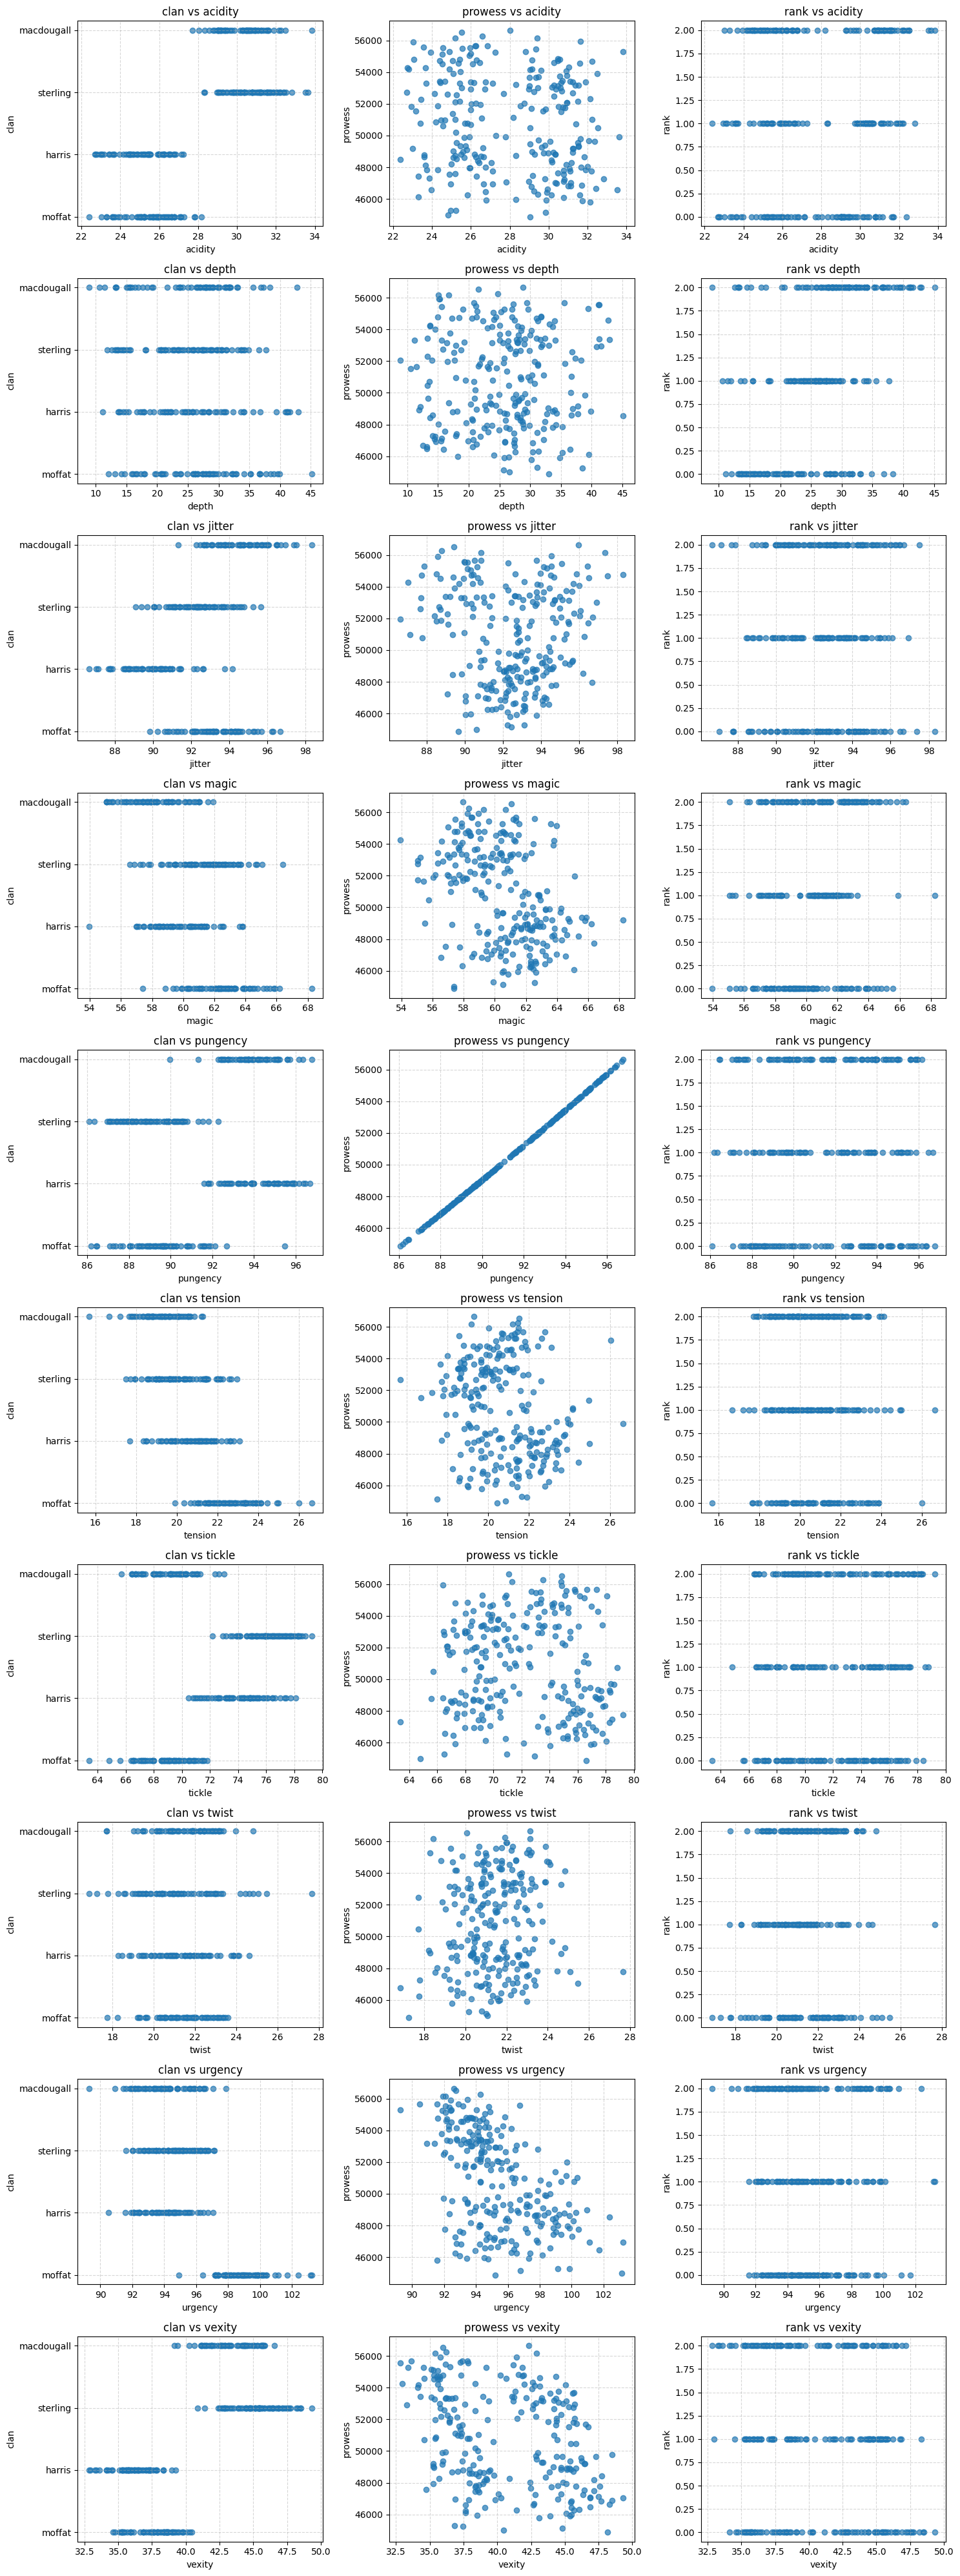

In [6]:
# TODO: add code for task 1

# data[:250] are last year's training data
data_train = data[:250]
attributes = ['acidity', 'depth', 'jitter', 'magic',	'pungency', 'tension', 'tickle', 'twist', 'urgency', 'vexity']
labels = ['clan', 'prowess', 'rank']

# Plots relationships between columns in `attributes` and `labels`
x_cols = attributes
y_cols = labels
num_plots = len(x_cols) * len(y_cols)
fig, axes = plt.subplots(len(x_cols), len(y_cols), figsize=(5 * len(y_cols), 4 * len(x_cols)))

for i, x_col in enumerate(x_cols):
    for j, y_col in enumerate(y_cols):
        ax = axes[i][j]
        ax.scatter(data_train[x_col], data_train[y_col], alpha=0.7)
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_title(f"{y_col} vs {x_col}")
        ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**TODO**:
* briefly explain what you have done
and why

(max 50 words)

Response:
I have plotted graphs of all the input columns (attributes) against the output columns (labels). This helps me to better visualize which attributes tend to carry more weights in predicting the output labels. For example, I can see that prowess is highly correlated with pungency.

# Task 2: Who is who? (20 marks)

Although you have stats on all the moot participants, you do not know
which clans they belong to, nor how they fit into the game.

In this task, you are required to answer that first question: which clans
are the participants from?
* How will you formulate this as a machine learning problem?
* What assumptions do you need to make?
* How confident are you of your predictions?

When you have made your predictions, copy the values into the `answers` dataframe.

In [10]:
data_train = data[:250]
data_train_clan_label = pd.get_dummies(data_train, columns=['clan'])
data_train_clan_label

,acidity,depth,jitter,magic,pungency,tension,tickle,twist,urgency,vexity,prowess,rank,clan_harris,clan_macdougall,clan_moffat,clan_sterling
0,25.50,39.88,94.57,58.86,89.79,23.33,66.40,22.62,100.25,37.92,48821.48,2.0,False,False,True,False
1,23.94,29.69,90.65,63.60,95.59,22.63,78.08,20.61,91.91,33.37,55255.10,2.0,True,False,False,False
2,25.95,23.75,93.28,62.35,88.99,22.58,66.58,21.13,99.75,38.95,47956.21,1.0,False,False,True,False
3,32.05,27.23,92.93,60.54,90.59,19.14,78.57,21.94,93.32,44.40,49668.42,1.0,False,False,False,True
4,25.98,41.58,90.07,60.79,93.55,21.70,73.16,22.41,95.50,37.58,52935.17,2.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,30.59,31.92,96.93,60.11,93.60,20.15,68.14,20.24,94.40,42.88,53013.84,1.0,False,True,False,False
246,30.78,14.40,90.68,58.65,88.20,21.40,75.04,22.52,94.64,46.87,47102.20,0.0,False,False,False,True
247,23.30,17.97,91.65,62.26,88.49,23.33,68.92,22.47,98.85,38.67,47419.48,0.0,False,False,True,False
248,31.85,37.72,93.58,62.09,89.66,18.96,75.33,20.43,95.12,43.87,48664.73,1.0,False,False,False,True


Training samples: 200
Testing samples: 50
--- Evaluation Results ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      harris       1.00      1.00      1.00        10
  macdougall       1.00      1.00      1.00        16
      moffat       1.00      1.00      1.00        13
    sterling       1.00      1.00      1.00        11

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



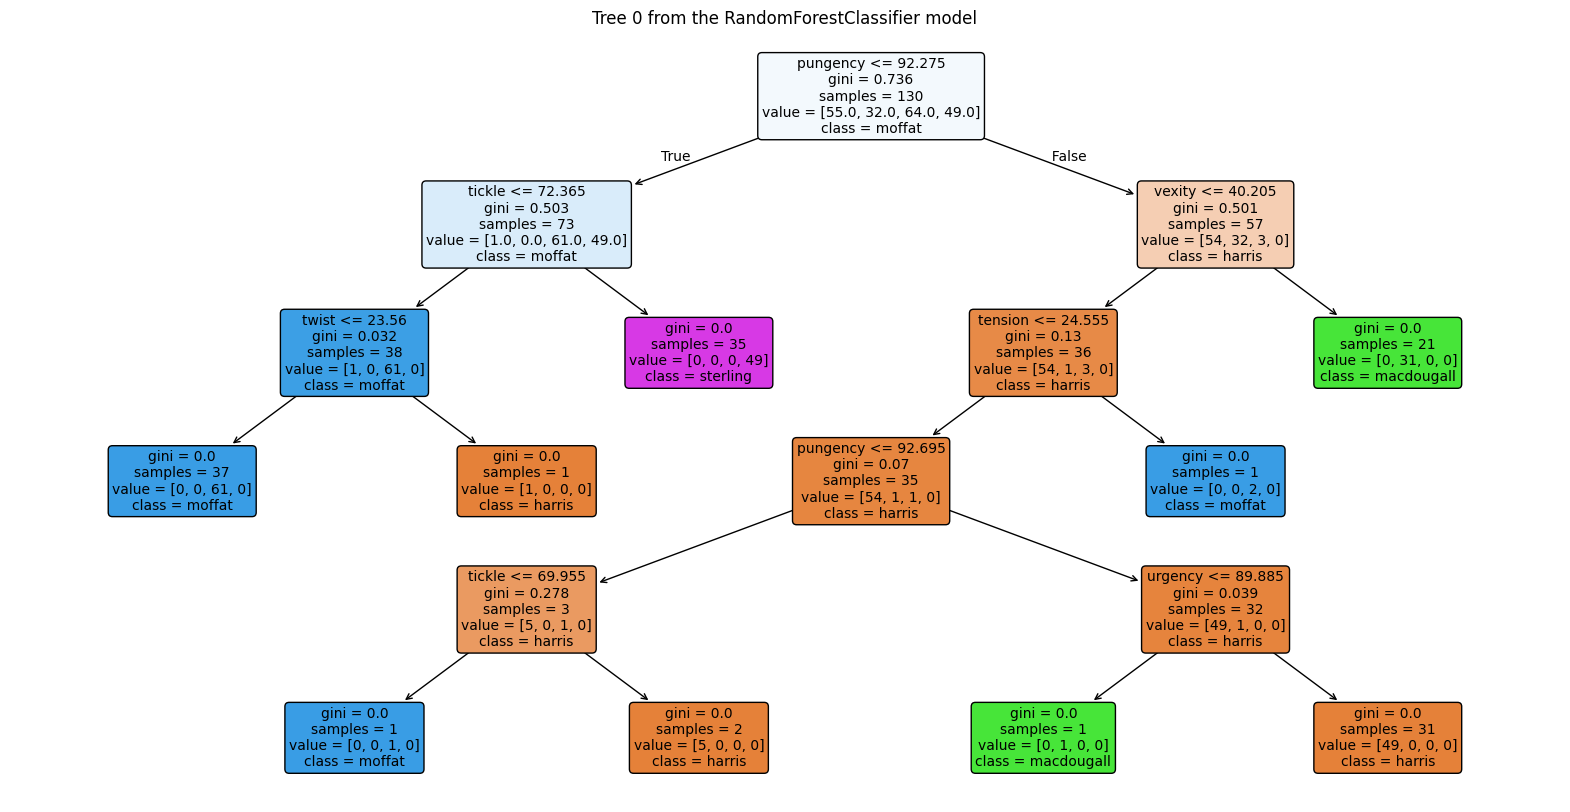

In [31]:
# TODO: add code for task 2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree

# data[:250] are last year's training data
data_train = data[:250]
attributes = ['acidity', 'depth', 'jitter', 'magic',	'pungency', 'tension', 'tickle', 'twist', 'urgency', 'vexity']
labels = ['clan', 'prowess', 'rank']

# Define input X and output y
X = data_train[attributes]
y = data_train['clan']
clan_types = data_train['clan'].unique().tolist()
clan_types.sort()

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Implement random forest classifier
rfc = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate the results
print("--- Evaluation Results ---")

# Check accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Per-label report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize a tree from the random forest (just the first tree)
plt.figure(figsize=(20, 10))
plot_tree(
    rfc.estimators_[0],
    feature_names=X.columns,
    class_names=clan_types,
    filled=True,
    rounded=True,
    max_depth=10,
    fontsize=10
)
plt.title("Tree 0 from the RandomForestClassifier model")
plt.show()

In [33]:
# Compute clan result for real data
data_real = data[250:]
X_real_test = data_real[attributes]
y_real_pred = rfc.predict(X_real_test)

# Store the result in `answers`
answers.loc[250:, 'clan'] = y_real_pred
answers

,acidity,depth,jitter,magic,pungency,tension,tickle,twist,urgency,vexity,clan,prowess,rank
0,25.50,39.88,94.57,58.86,89.79,23.33,66.40,22.62,100.25,37.92,moffat,48821.48,2.0
1,23.94,29.69,90.65,63.60,95.59,22.63,78.08,20.61,91.91,33.37,harris,55255.10,2.0
2,25.95,23.75,93.28,62.35,88.99,22.58,66.58,21.13,99.75,38.95,moffat,47956.21,1.0
3,32.05,27.23,92.93,60.54,90.59,19.14,78.57,21.94,93.32,44.40,sterling,49668.42,1.0
4,25.98,41.58,90.07,60.79,93.55,21.70,73.16,22.41,95.50,37.58,harris,52935.17,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,26.45,36.11,88.80,60.02,96.06,22.53,77.16,22.79,90.01,31.62,harris,NaN,NaN
496,30.83,23.26,91.36,60.50,87.34,20.50,75.16,20.54,97.69,46.59,sterling,NaN,NaN
497,30.44,32.62,91.25,60.43,88.48,20.97,75.17,22.04,97.02,46.65,sterling,NaN,NaN
498,27.15,27.57,93.81,60.45,90.73,23.33,69.93,16.15,99.73,38.31,moffat,NaN,NaN


**TODO**:
* briefly explain what you have done and why

(max 50 words)

Response:
Based on the visualization result in task 1, I think that a decision tree classifier can be a good approach to predict clan types since it is a classification problem with some clear boundaries. Hence, I decided to train a random forest classifier model using sklearn.

# Task 3: How are players ranked? (20 marks)

You know that Grachlangenball players are **ranked** on
a simple ordinal scale with three levels — 0, 1 and 2.
Players only compete against others of the same rank.

Each clan has its own traditional criteria for awarding ranks,
and they guard the details jealously. But by all accounts the
rules are very simple. As one informant undiplomatically noted
— after carefully making sure no clansfolk were within earshot —
“Not one o' these slaverin' dobbies can hold two thoughts in
their heads at the same time!”

Given last year's rankings, can you figure out the criteria for
each clan and assign ranks to all this year's participants?

Once again, when you have done so, add your rank predictions to
the `answers` table.

In [ ]:
# TODO: add code for task 3

**TODO**:
* briefly explain what you have done and why
* state the ranking criteria for each clan

(max 50 words)

# Task 4: What is **prowess**? (20 marks)

When two players square off in a Grachlangenball match, the winner is
determined by their relative **prowess**.

This mysterious quality is defined and assessed by the Grachlangenball
Prowess Trust, a cabal of wily sages who lay down the rules of the game.
The Trust loudly proclaim their independence from all the clans, but
Machlearnia is a cynical place and conspiratorial rumours abound.

It is widely agreed that the Trust members are a cut above the
clansfolk intellectually, and the prowess calculation is not as
simple as the rankings. It *is* still fairly simple, though. According
to a down-at-heel bard you met in a tavern, whose unhappy romantic history
included not one but two members of the Trust, the prowess formula has
only “a handful” of terms, and he believed those terms to have
**integer coefficients**. Though he couldn't tell you what either of
those words mean.

Your task is to figure out what this formula is and work out the prowess
for all participants. Add those values into the `answers` dataframe too.

In [ ]:
# TODO: add code for task 4

**TODO**:
* briefly explain what you have done and why
* state the prowess formula you have inferred

(max 50 words)

# Task 5: Tournament (10 marks)

A Grachlangenball tournament consists of a **round robin** series of
matches between the clans, such that within each rank each clan plays
against every other clan exactly once. So there will be

$$
\binom{n_{clans}}{2} \times n_{ranks}
$$

matches — 12 in this case.

For each individual match, one player of the appropriate rank is chosen
at random from each of the two clans, and the two players go head to
head. The course of the game involves a lot of flexing and posturing,
psych-outs and threats, thrusts and parries, athleticism, skill and
furious appeals to the referee. At the end of which performance, and
regardless of whatever occurred in the meantime, the player with the
highest prowess is declared the winner.

Once all the matches have taken place, if there is one clan with the
most wins, that clan takes the title and the tournament is over. But
if there are multiple clans with the same highest number of wins, any
lower scoring clans are eliminated and the whole process starts over
with the remaining clans. This can continue for up to five complete
rounds. If there still isn't a clear winner on the fifth round, a draw
is declared.

**Nobody likes a draw.**

Given the rules as described above, together with the team stats
estimated in tasks 2–4, can you work out the approximate probabilities
of each clan winning this year's tournament?

In [ ]:
# TODO: add code for task 5

**TODO**:
* briefly explain what you have done and why
* what is your estimated win probability for each clan?

(max 50 words)

# Task 6: What chance peace? (10 marks)

As already noted, **nobody likes a draw.**

Draws are no fun. All bets are void. Machlearnia has no Heroes.

There is (according to the grim precepts of the clans) honour in
losing bravely against a valiant foe. But there is no honour in
losing to also-losers. *Everyone* loses. Everyone slinks home
shamefaced, vowing never to speak of it again.

It is generally understood that this level of shame is not
sustainable. If the moot were to **end in a draw for two years
running**, the clans would inevitably cast aside the empty
masquerade of “peace” and return to their traditional pastimes
of slaughter and mayhem.

At the same time, **nobody likes an unwinnable game**. If the
same clan keeps winning year after year after year, what's even
the point in playing? Might as well go on a bloody rampage with
lashings of the old ultraviolence.

The clans respect strength and are more tolerant of dominance than
equality. But **five wins in a row** would stir up suspicions as to
the impartiality of the Grachlangenball Prowess Trust — with inevitably
brutal consequences.

You don't know what the result was last year, only that it concluded
peacefully.

How likely is it that this Clanmoot will end in a bloodbath?

For that matter, how surprising is it that the current peace has
held for 38 years?

In [ ]:
# TODO: add code for task 6

**TODO**:
* briefly explain what you have done and why
* should you get the hell out of Dodge?

(max 50 words)

# Exporting & Submitting

You should submit your answers via Moodle. Text and code will be
manually graded in this notebook. Your predictions for tasks 4—6 will
be marked automatically.

* Ensure that your predictions for **clan**, **rank** and **prowess**
are recorded in the `answers` dataframe.
* Run the cell below to export the `answers` dataframe as a CSV file.


In [ ]:
answers.to_csv('1675294699.csv', index=False)

* Download both the `1675294699.csv` file you just exported and your
completed notebook file (`1675294699.ipynb`).
* Zip both files into an archive called `1675294699.zip` and submit
this using the coursework submission activity on Moodle.